In [3]:
import imageio      #Para leer y guardar imagenes.
import numpy as np  #Operaciones con vectores, matrices, tensores...
import matplotlib.pyplot as plt    #Para realizar graficos.

import warnings     # (Opcional) Es para evitar algunos mensajes de warning.
warnings.filterwarnings('ignore')

#Para realizar los graficos en la misma linea de codigo.
%matplotlib inline 

In [4]:
#Matriz de transformación para YIQ.
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

#Matriz de transformación para RGB.
M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

#Función para operaciones con matrices.
def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

#Función simplificada para convertir RGB->YIQ.
def rgb2yiq(img):
    return apply_matrix(img, M_YIQ)

#Función simplificada para convertir YIQ->RGB.
def yiq2rgb(img):
    return apply_matrix(img, M_RGB)

(489, 696, 3)
(489, 696, 3)


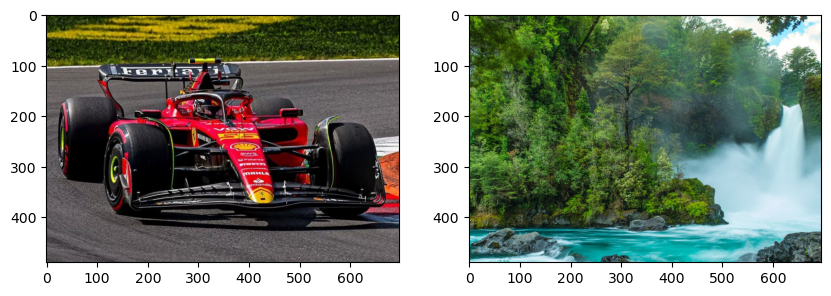

In [6]:
img_rgb1 = imageio.imread('img/ferrari.jpg')/255
img_rgb2 = imageio.imread('img/cascada.jpg')/255

img_rgb2 = img_rgb2[0:489,200:896,:] #con esto basicamente llevo la imagen 2 a tener el mismo tamaño que
                                     #...la imagen uno

fig, axes = plt.subplots(1, 2, figsize=(10,5))                 
axes[0].imshow(img_rgb1)
axes[1].imshow(img_rgb2)

print(img_rgb1.shape)                                             
print(img_rgb2.shape)

#basicamente todo este bloque pone las imagenes de mismo tamaño y las muestra.

1) Suma y diferencia clampeada en RGB.

Text(0.5, 1.0, 'Dif. Clampeada')

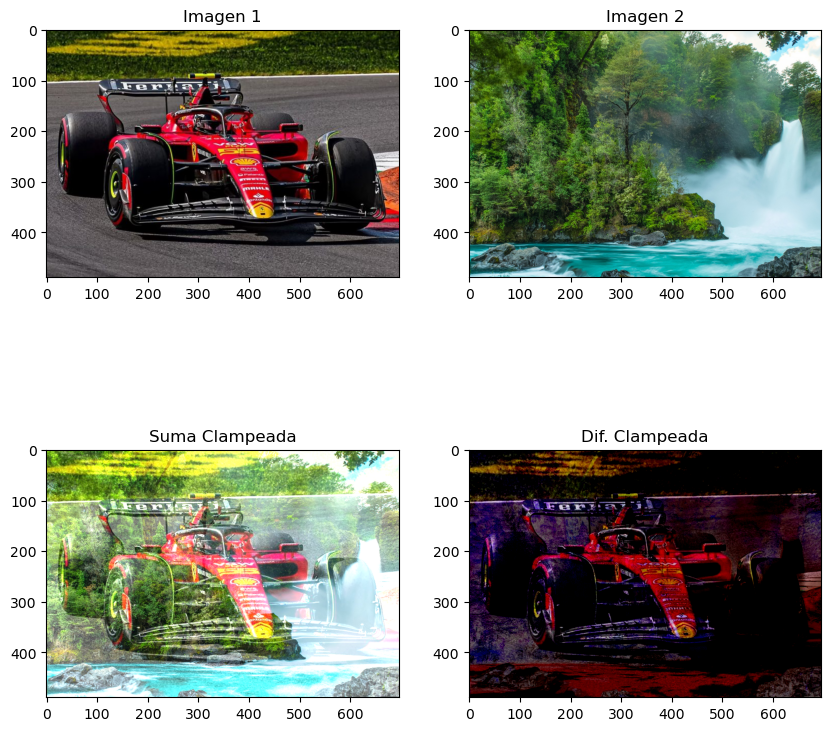

In [8]:
sumaimg = img_rgb1 + img_rgb2 #Aqui sumo las imagenes
sumaimg = np.clip(sumaimg, 0, 1) #y aqui las clampeo para que no se pasen de rango.

difimg = img_rgb1 - img_rgb2   #Aqui hago la diferencia las imagenes
difimg = np.clip(difimg, 0, 1)  #y aqui las clampeo para que no se pasen de rango.

fig, axes = plt.subplots(2, 2, figsize=(10,10)) 
axes[0,0].imshow(img_rgb1)
axes[0,0].set_title('Imagen 1')
axes[0,1].imshow(img_rgb2)
axes[0,1].set_title('Imagen 2')
axes[1,0].imshow(sumaimg)
axes[1,0].set_title('Suma Clampeada')
axes[1,1].imshow(difimg)
axes[1,1].set_title('Dif. Clampeada')

Creo que logré los resultados deseados, puedo apreciar que al realizar la diferencia por ejemplo en la zona de la esquina superior derecha, el verde oscuro "se le resta" un blanco intenso, lo cual estimo que ese pixel se paso de largo en la resta y se "clampeó" a 0, es decir, color negro. Luego en la suma, se puede observar cómo aparece saturación en muchos sectores de la imagen.

2) Suma y diferencia promediada en RGB

Text(0.5, 1.0, 'Diferencia Promediada')

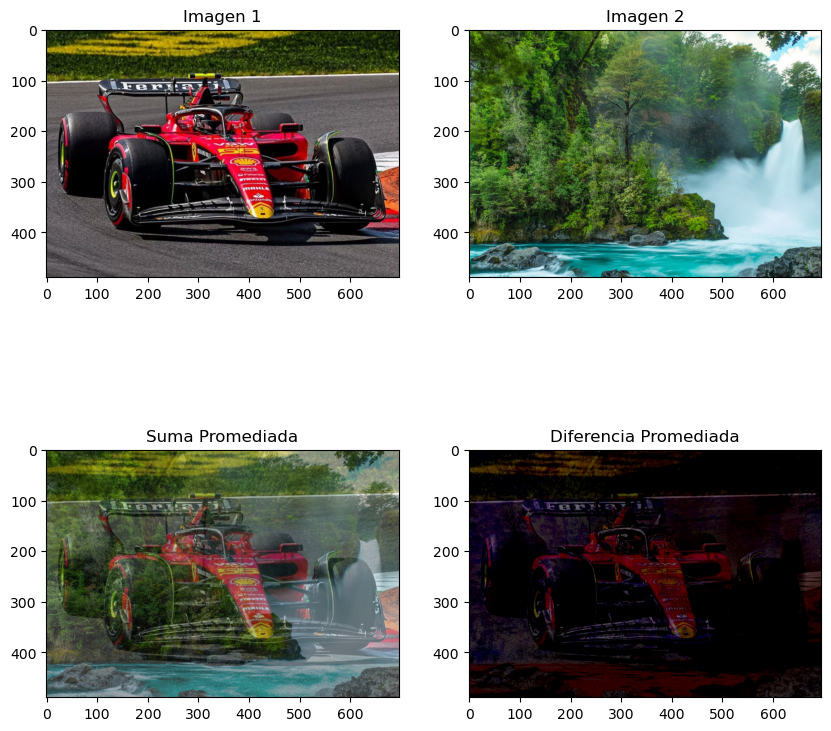

In [9]:
imgpromsum = (img_rgb1 + img_rgb2)/2                        #Se suman las imagenes
imgpromsum = np.clip(imgpromsum, 0 , 1)                    #Luego se limitan los valores entre 0 y 1 

imgpromdif= (img_rgb1 - img_rgb2)/2                         #Se hace la dif entre las imagenes
imgpromdif = np.clip(imgpromdif, 0 , 1)                    #Luego se limitan los valores entre 0 y 1 

fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0,0].imshow(img_rgb1)
axes[0,0].set_title('Imagen 1')
axes[0,1].imshow(img_rgb2)
axes[0,1].set_title('Imagen 2')
axes[1,0].imshow(imgpromsum)
axes[1,0].set_title('Suma Promediada')
axes[1,1].imshow(imgpromdif)
axes[1,1].set_title('Diferencia Promediada')

3) Suma en YIQ. (Suma interpolada de IQ)

Text(0.5, 1.0, 'Resta Promediada en YIQ')

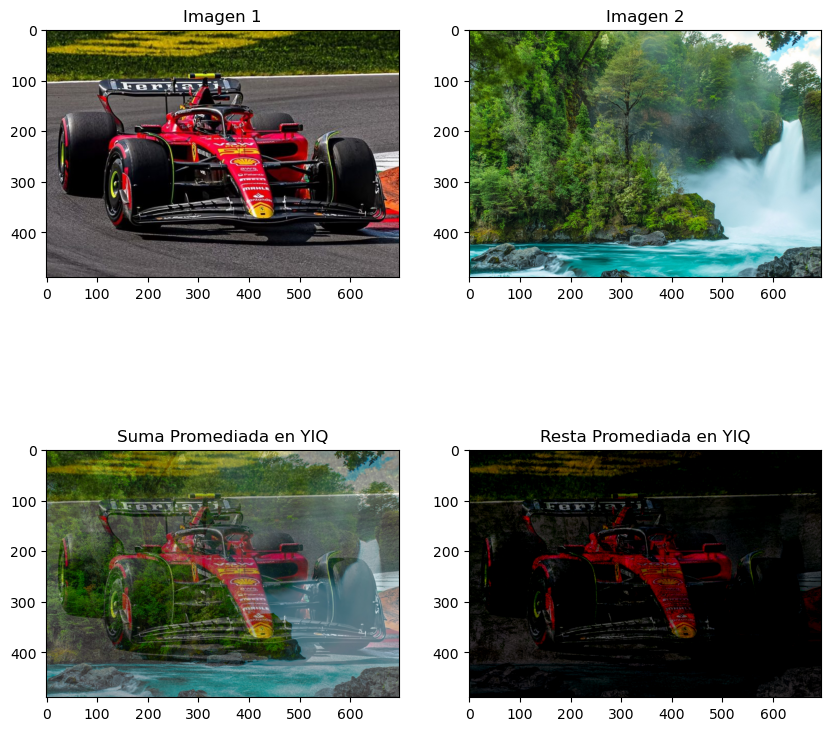

In [10]:
#Primero que nada como se vio en la teoría hay que pasar a YIQ y dividir los canales, ya que 
#se operará con los canales por separado para la interpolacion 

img_1_yiq = rgb2yiq(img_rgb1)   
img_1_y = img_1_yiq[:,:,0]
img_1_i = img_1_yiq[:,:,1]
img_1_q = img_1_yiq[:,:,2]

img_2_yiq = rgb2yiq(img_rgb2)
img_2_y = img_2_yiq[:,:,0]
img_2_i = img_2_yiq[:,:,1]
img_2_q = img_2_yiq[:,:,2]

#Se realiza la cuasi-suma en luminancias. Esto precisamente lo podemos lograr trabajando en el espacio YIQ.
#de la teoria...
#YC := YA + YB; If YC > 1 then YC:=1; {suma clampeada}
#YC := (YA + YB) / 2; {suma promediada}
#como no especifica en la consigna cual utilizar, me quedo con la suma promediada.
#con lo cual:

img_sumaprom_y = (img_1_y + img_2_y)/2
img_restaprom_y = (img_1_y - img_2_y)/2


#como dice en la teoría la forma correcta de realizar la interpolacion es:
#IC := (YA * IA + YB * IB) / (YA + YB) ;
#QC := (YA * QA + YB * QB) / (YA + YB) ;
#por ende...

#la suma interpolada resulta...

img_sumaprom_i = (img_1_y * img_1_i + img_2_y * img_2_i) / (img_1_y + img_2_y)
img_sumaprom_q = (img_1_y * img_1_q + img_2_y * img_2_q) / (img_1_y + img_2_y)
 
img_sumaprom = img_2_yiq

# Se combinan los 3 canales en una sola matriz

img_sumaprom [:,:,0] = img_sumaprom_y    
img_sumaprom [:,:,1] = img_sumaprom_i
img_sumaprom [:,:,2] = img_sumaprom_q

#Se vuelve a RGB

img_sumaprom_rgb = yiq2rgb(img_sumaprom)   

#Resta...-------------------------------------------------

img_restaprom_i = (img_1_y * img_1_i + img_2_y * img_2_i) / (img_1_y + img_2_y)
img_restaprom_q = (img_1_y * img_1_q + img_2_y * img_2_q) / (img_1_y + img_2_y)
 
img_restaprom = img_2_yiq

# Se combinan los 3 canales en una sola matriz

img_restaprom [:,:,0] = img_restaprom_y    
img_restaprom [:,:,1] = img_restaprom_i
img_restaprom [:,:,2] = img_restaprom_q

#Se vuelve a RGB

img_restaprom_rgb = yiq2rgb(img_restaprom)   

fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0,0].imshow(img_rgb1)
axes[0,0].set_title('Imagen 1')
axes[0,1].imshow(img_rgb2)
axes[0,1].set_title('Imagen 2')
axes[1,0].imshow(np.clip(img_sumaprom_rgb,0,1))
axes[1,0].set_title('Suma Promediada en YIQ')
axes[1,1].imshow(np.clip(img_restaprom_rgb,0,1))
axes[1,1].set_title('Resta Promediada en YIQ')

4) Implementacion de las funciones "iflighter" y "ifdarker"

In [13]:
#----------------------------------iflighter -----------------------------------------------------
def if_lighter (img1, img2):
    
    #El pseudocodigo q nos brindó la cátedra menciona que iflighter tiene la siguiente forma
    #if YA > YB  then {YC := YA; IC := IA; QC := QA}
                #else {YC := YB; IC := IB; QC := QB};
        
    #asi q mi planteamiento es el siguiente, paso las img a yiq y divido los canales por si lo preciso.
    
    img_1_yiq = rgb2yiq(img_rgb1)   
    img_1_y = img_1_yiq[:,:,0]
    img_1_i = img_1_yiq[:,:,1]
    img_1_q = img_1_yiq[:,:,2]

    img_2_yiq = rgb2yiq(img_rgb2)
    img_2_y = img_2_yiq[:,:,0]
    img_2_i = img_2_yiq[:,:,1]
    img_2_q = img_2_yiq[:,:,2]
    
    # Obtener la altura de la imagen
    altura = len(img_1_yiq)

    # Obtener la anchura de la imagen (suponiendo que todas las filas tienen la misma longitud)
    anchura = len(img_1_yiq[0])
    
    #Estaba probando si efectivamente agarraba bien el alto y el ancho de la imagen printeandola *ignorar*
    #print(f"Altura: {altura}")
    #print(f"Anchura: {anchura}")
    
    img_salida = np.zeros(img_1_yiq.shape) #inicializo una imagen con el mismo tamaño pero vacia para ir confeccionandola
    
    for i in range(altura): # Recorre las filas
        for j in range(anchura):  # Recorre las columnas
            if img_1_y[i][j]>img_2_y[i][j]:
                img_salida[i,j,0] = img_1_y[i][j]  # Canal Y
                img_salida[i,j,1] = img_1_i[i][j]  # Canal I
                img_salida[i,j,2] = img_1_q[i][j]  # Canal Q
            else:
                img_salida[i,j,0] = img_2_y[i][j]  # Canal Y
                img_salida[i,j,1] = img_2_i[i][j]  # Canal I
                img_salida[i,j,2] = img_2_q[i][j]  # Canal Q
                    
    return img_salida

#basicamente me adapte al concepto visto en la teoria, pregunto exactamente lo que decía el pseudocódigo y si el canal Y
#de la img1 es mas grande que el de la img2 basicamente le asigno a la img de salida los canales de la img1, caso contrario,
#lo contrario, valga la redundancia jaja.

#----------------------------------ifdarker -----------------------------------------------------

def if_darker (img1, img2):
    
    #El pseudocodigo q nos brindó la cátedra menciona que iflighter tiene la siguiente forma
    #if YA < YB  then {YC := YA; IC := IA; QC := QA}
                #else {YC := YB; IC := IB; QC := QB};
        
    #asi q mi planteamiento es el siguiente, paso las img a yiq y divido los canales por si lo preciso.
    
    img_1_yiq = rgb2yiq(img_rgb1)   
    img_1_y = img_1_yiq[:,:,0]
    img_1_i = img_1_yiq[:,:,1]
    img_1_q = img_1_yiq[:,:,2]

    img_2_yiq = rgb2yiq(img_rgb2)
    img_2_y = img_2_yiq[:,:,0]
    img_2_i = img_2_yiq[:,:,1]
    img_2_q = img_2_yiq[:,:,2]
    
    # Obtener la altura de la imagen
    altura = len(img_1_yiq)

    # Obtener la anchura de la imagen (suponiendo que todas las filas tienen la misma longitud)
    anchura = len(img_1_yiq[0])
    
    #Estaba probando si efectivamente agarraba bien el alto y el ancho de la imagen printeandola *ignorar*
    #print(f"Altura: {altura}")
    #print(f"Anchura: {anchura}")
    
    img_salida = np.zeros(img_1_yiq.shape) #inicializo una imagen con el mismo tamaño pero vacia para ir confeccionandola
    
    for i in range(altura): # Recorre las filas
        for j in range(anchura):  # Recorre las columnas
            if img_1_y[i][j]<img_2_y[i][j]:
                img_salida[i,j,0] = img_1_y[i][j]  # Canal Y
                img_salida[i,j,1] = img_1_i[i][j]  # Canal I
                img_salida[i,j,2] = img_1_q[i][j]  # Canal Q
            else:
                img_salida[i,j,0] = img_2_y[i][j]  # Canal Y
                img_salida[i,j,1] = img_2_i[i][j]  # Canal I
                img_salida[i,j,2] = img_2_q[i][j]  # Canal Q
                    
    return img_salida


#if_lighter(img_rgb1,img_rgb2)

    
    
    

Text(0.5, 1.0, 'Ifdarker (bien)')

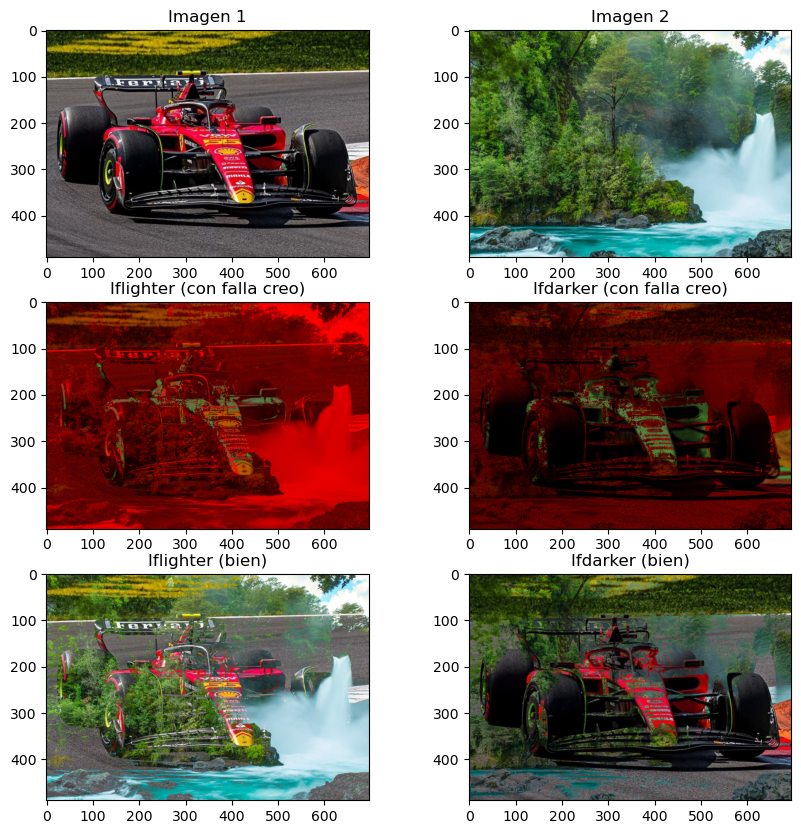

In [18]:
#Llamado a las funciones Iflighter e Ifdarker

img_final1 = if_lighter(img_rgb1,img_rgb2)
img_final2 = if_darker(img_rgb1,img_rgb2)

img_final1_rgb = yiq2rgb(img_final1)
img_final2_rgb = yiq2rgb(img_final2)

fig, axes = plt.subplots(3, 2, figsize=(10,10))
axes[0,0].imshow(img_rgb1)
axes[0,0].set_title('Imagen 1')
axes[0,1].imshow(img_rgb2)
axes[0,1].set_title('Imagen 2')
axes[1,0].imshow(np.clip(img_final1,0,1))
axes[1,0].set_title('Iflighter (con falla creo)')
axes[1,1].imshow(np.clip(img_final2,0,1))
axes[1,1].set_title('Ifdarker (con falla creo)')
axes[2,0].imshow(np.clip(img_final1_rgb,0,1))
axes[2,0].set_title('Iflighter (bien)')
axes[2,1].imshow(np.clip(img_final2_rgb,0,1))
axes[2,1].set_title('Ifdarker (bien)')

Mmm lo veo un tanto extraño el iflighter y el ifdarker, osea, revisé el codigo y a mi criterio está bien. Quizá se deba a que no elegí las imágenes idóneas para la tarea y el efecto no es tan notorio.

PD: intenté llevarlas de nuevo a RGB y parece que se solucionó el problema.

Dejo en constancia igual el otro resultado por las dudas.